# Apple Quality Classifier

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

# load the dataset
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

# Functions

In [39]:
from sklearn.ensemble import AdaBoostClassifier


def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SupportVector": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
        "LinearDiscrim":LinearDiscriminantAnalysis(),
        "GaussianProcessClassifier":GaussianProcessClassifier(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

# EDA Analysis

In [3]:
df = pd.read_csv("apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [4]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dropna(inplace=True)

In [11]:
target = df.values[:,-1]
counter = Counter(target)

for k,v in counter.items():
  per = v/len(target) * 100
  print("Class=%s, Count=%d, Percentage=%.3f%%" % (k,v,per))

Class=good, Count=2004, Percentage=50.100%
Class=bad, Count=1996, Percentage=49.900%


### We have a balanced dataset here which is great news

<Axes: xlabel='Quality'>

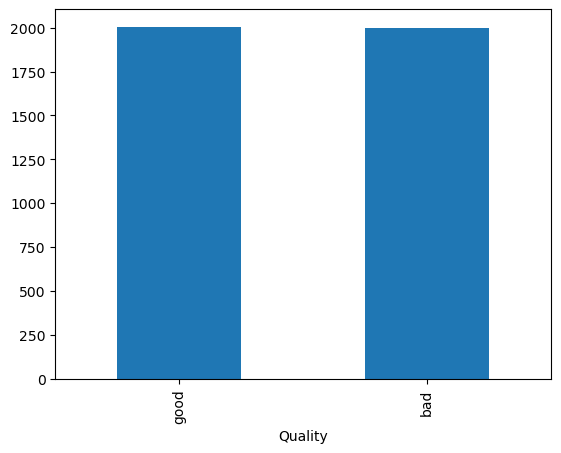

In [12]:
df['Quality'].value_counts().plot.bar()

In [13]:
df.drop("A_id", axis=1, inplace=True)

In [14]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [21]:
df["Quality"] = df["Quality"].apply(lambda x: 1 if x == "good" else 0)

# Data Preparation

In [22]:
df["Quality"].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

# Visuals

<Axes: >

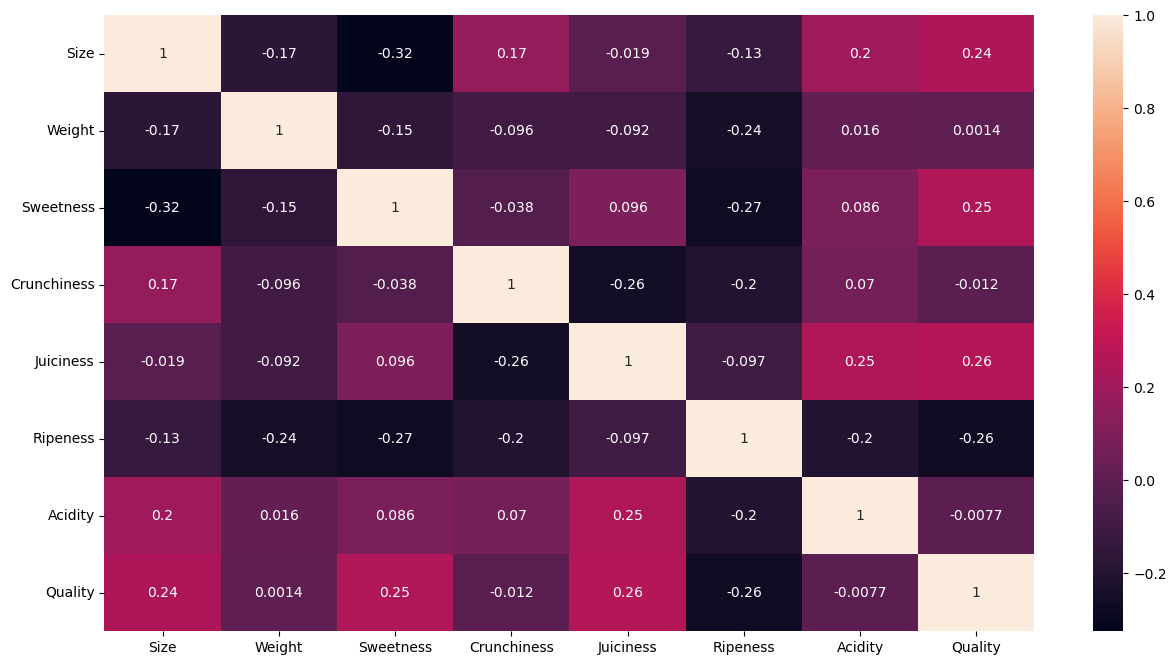

In [23]:
relations = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=relations, annot=True)

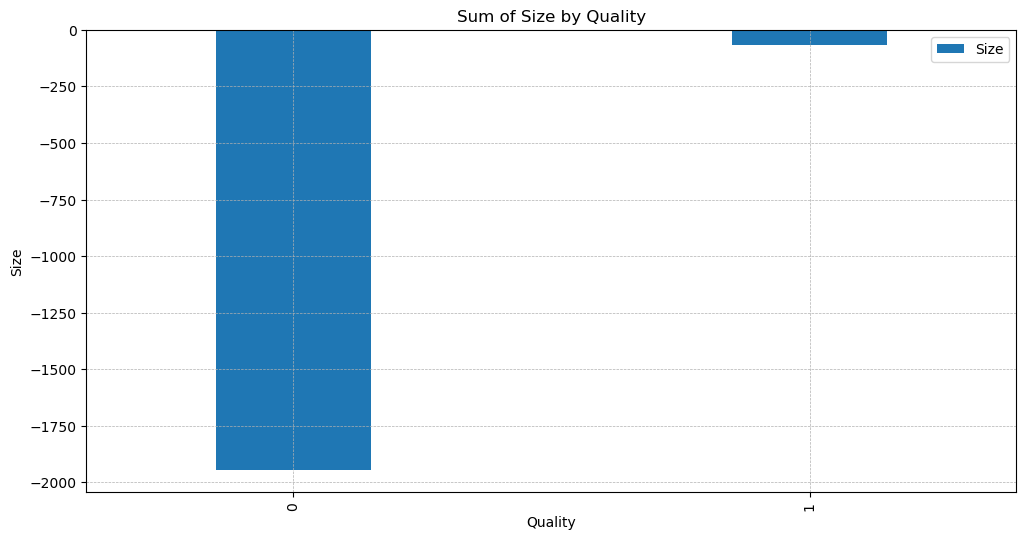

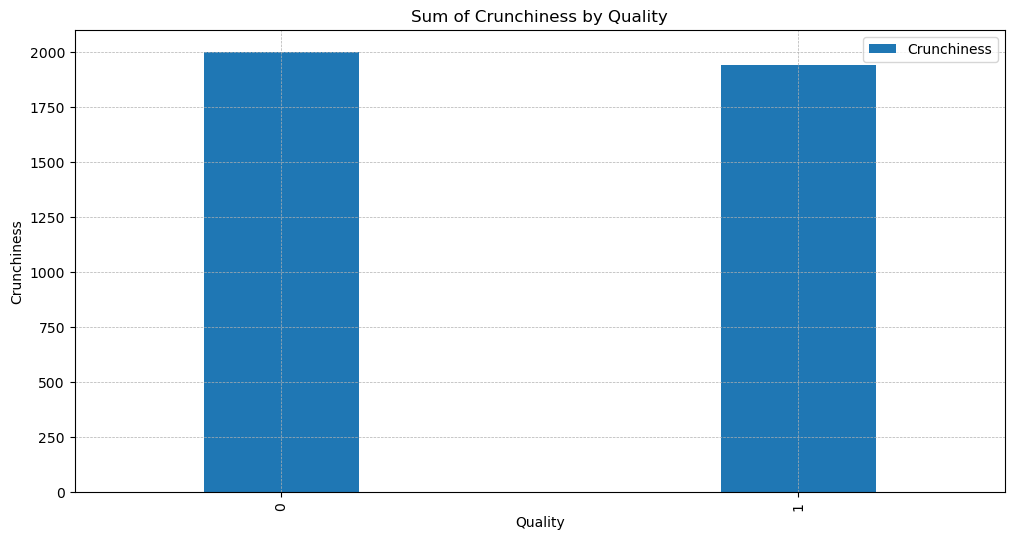

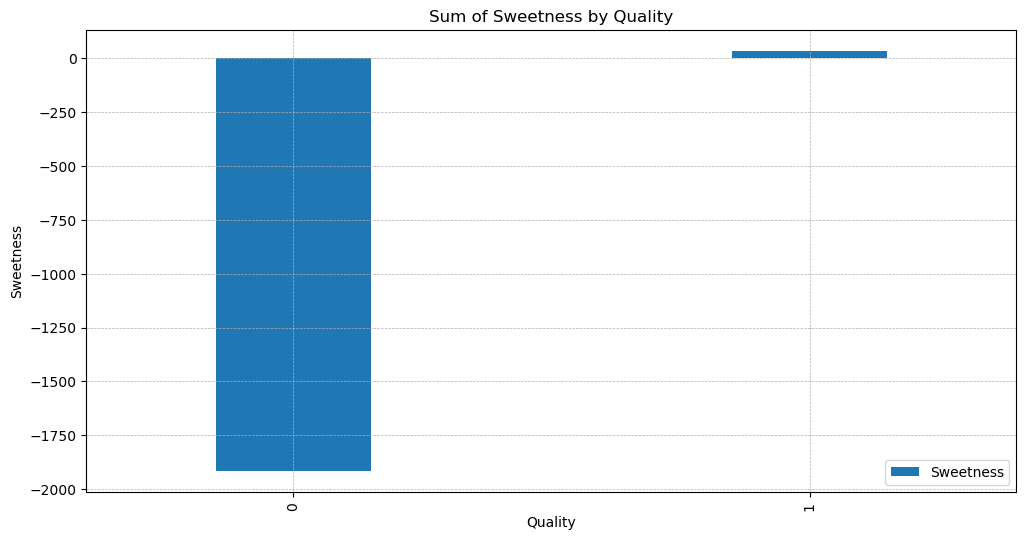

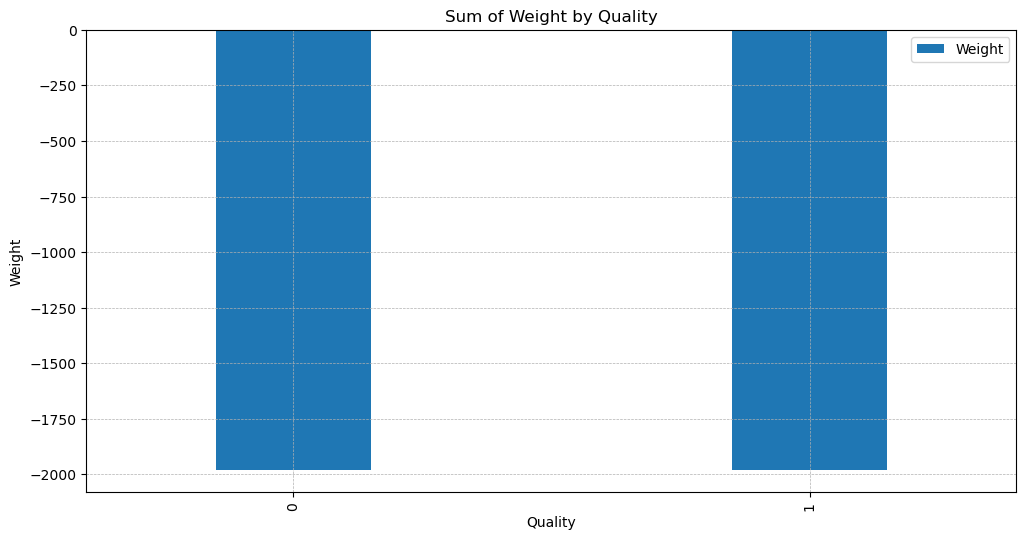

In [31]:
# Set a larger figure size and higher resolution
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

interested_columns = ["Size", "Crunchiness", "Sweetness", "Weight" ]

for col in interested_columns:
  group_df = df.groupby("Quality")[col].sum().reset_index()
  group_df.plot(kind="bar", x="Quality", y=col, width=0.3)
  plt.xlabel("Quality")
  plt.ylabel(f"{col}")
  # Add gridlines
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.title(f"Sum of {col} by Quality")

  # Show the plot
  plt.show()

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/1878150304.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/1878150304.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/1878150304.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/1878150304.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/1878150304.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/1878150304.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/18781

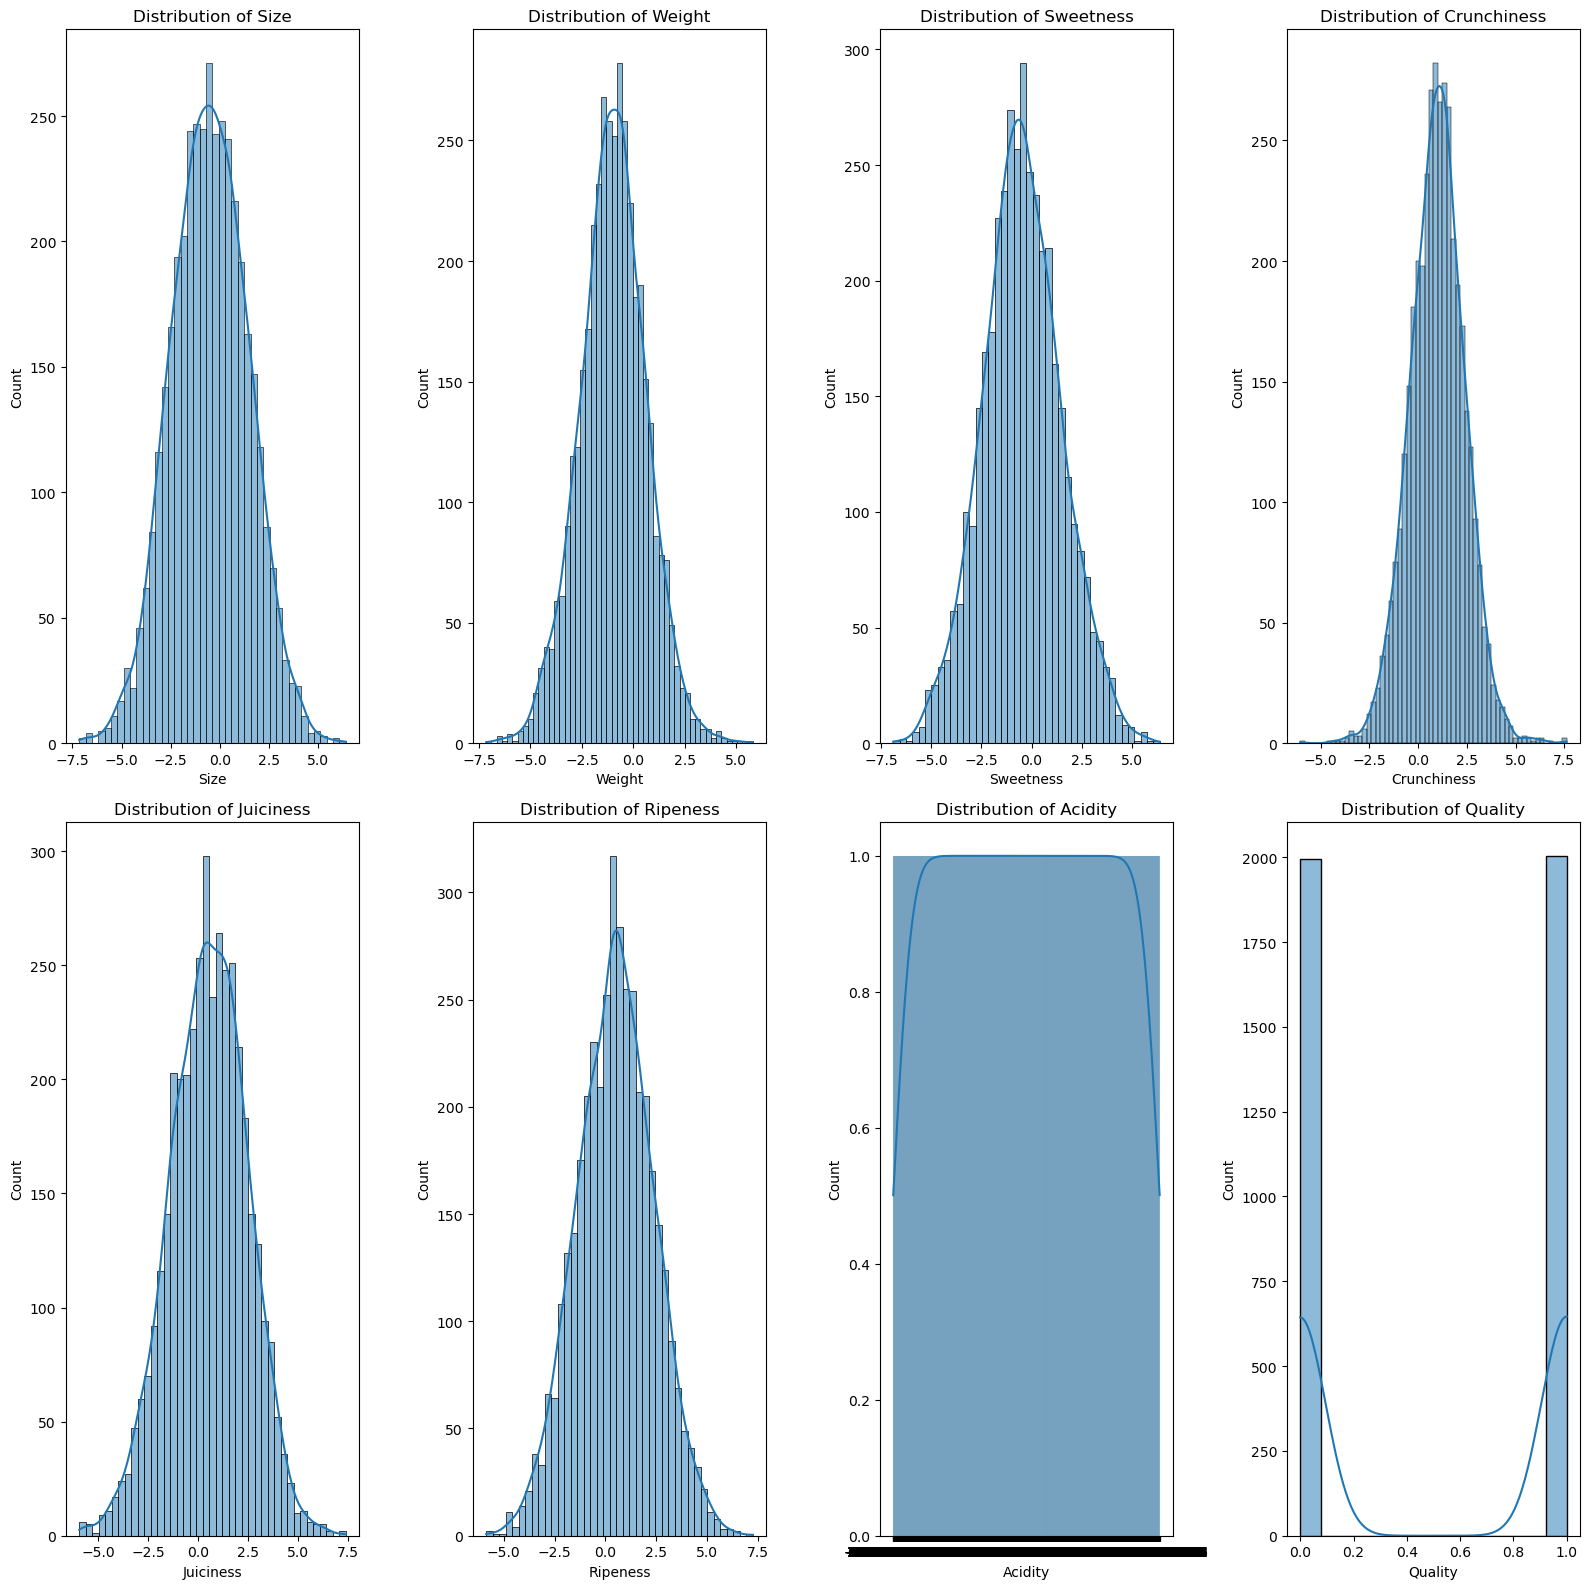

In [32]:
df_width= len(df.columns)
rows = (df_width +3)//4
plt.figure(figsize=(16,16))

for idx, col in enumerate(df.columns):
  plt.subplot(rows, 4, idx+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.plot()

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/3390829395.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/3390829395.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/3390829395.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/3390829395.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/3390829395.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/3390829395.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/33908

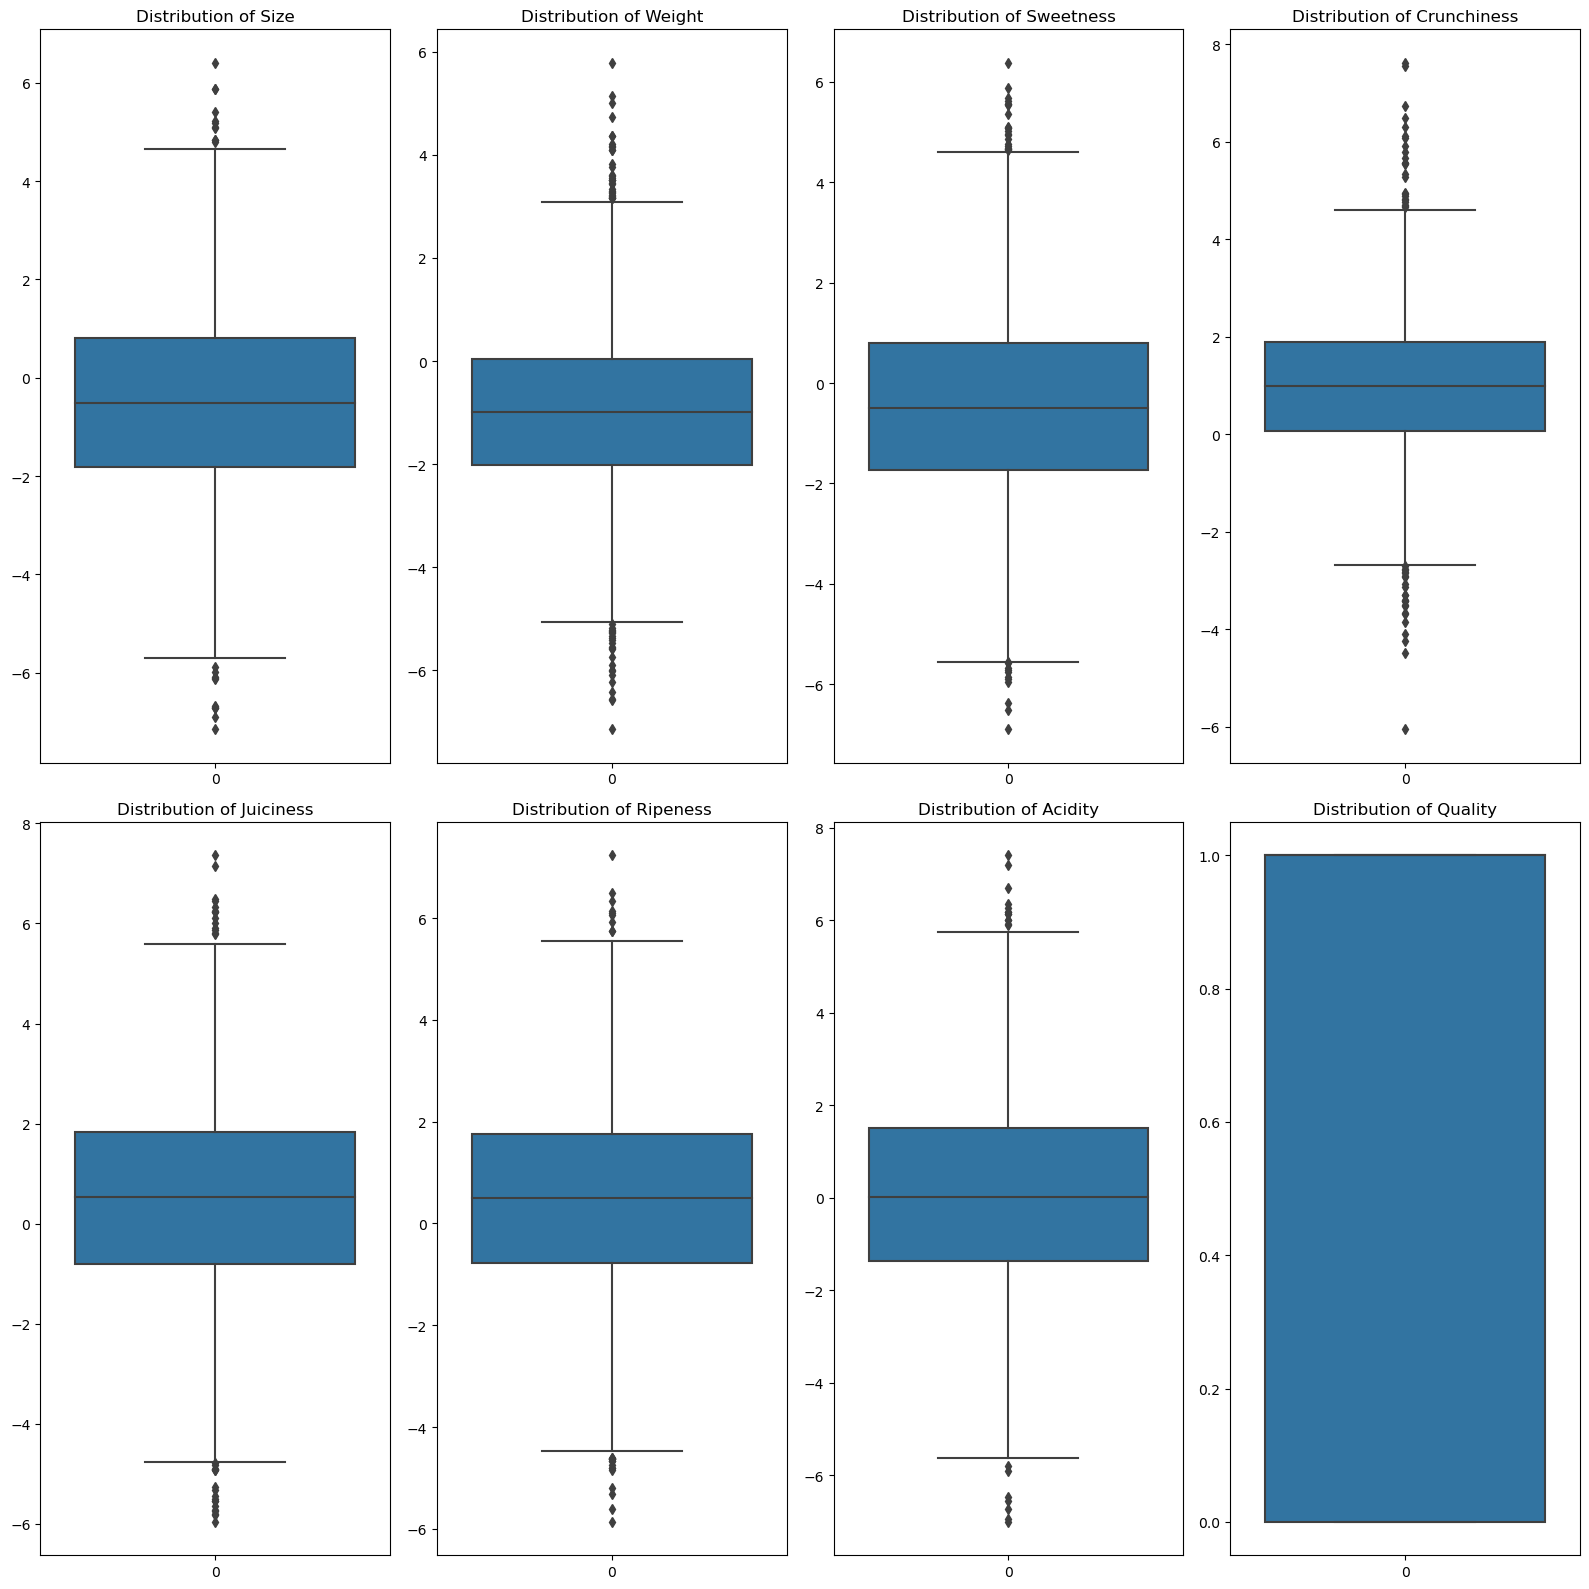

In [33]:
df_width= len(df.columns)
rows = (df_width +3)//4
plt.figure(figsize=(16,16))

for idx, col in enumerate(df.columns):
  plt.subplot(rows, 4, idx+1)
  sns.boxplot(df[col])
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.plot()

### Lots of outliers in the data set, perhaps removing this data can improve predictive modeling scores

# Model Evaluation

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
  return scores

last_ix = len(df.columns) - 1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
model = DummyClassifier(strategy='uniform')
pipeline = Pipeline(steps=[('s',StandardScaler()),('m',model)])
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean accuracy: 0.501 (0.026)


### Baseline model should perform better than 50%

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

25/25 [==============================] - 0s 500us/step - loss: 0.1315 - accuracy: 0.9650


,Model,Accuracy
9,Sequential,0.96500
8,GaussianProcessClassifier,0.91750
1,SupportVector,0.90375
4,KNeighborsClassifier,0.90250
3,RandomForestClassifier,0.90125
5,GradientBoostingClassifier,0.87000
2,DecisionTreeClassifier,0.81000
6,GaussianNB,0.76250
7,LinearDiscrim,0.75750
0,LogisticRegression,0.75375


### A range of models performed great, let us do some further testing to see what can be improved upon

# Advanced Model Metrics

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_sequential_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Changed loss to binary_crossentropy for binary classification
    return model

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  metric = make_scorer(accuracy_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

# define models to test
def get_models():
  models, names = list(), list()
  # GPC
  models.append(GaussianProcessClassifier()) 
  names.append('GPC')
  # RFC
  models.append(RandomForestClassifier())
  names.append('RFC')
  # GBC
  models.append(GradientBoostingClassifier())
  names.append('GBC')
  # SVC
  models.append(SVC())
  names.append('SVC')
  # KNN
  models.append(KNeighborsClassifier())
  names.append('KNN')
  models.append(KerasClassifier(build_fn=create_sequential_model, epochs=50, batch_size=10, verbose=0))
  names.append('Sequential')
  
  return models, names

last_ix = len(df.columns)-1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
models, names = get_models()
# evaluate each model
for i in range(len(models)):
  # Wrap the model in a pipeline with StandardScaler
  pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', models[i])])
  # Evaluate the model
  scores = evaluate_model(X, y, pipeline)  # Replace X, y with your data
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/3040681827.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  models.append(KerasClassifier(build_fn=create_sequential_model, epochs=50, batch_size=10, verbose=0))
python(47573) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47578) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(47579) MallocStackLogging

>GPC 0.906 (0.011)


python(48056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(48057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(48058) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(48059) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
python(48060) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


>RFC 0.886 (0.014)
>GBC 0.856 (0.014)
>SVC 0.890 (0.013)
>KNN 0.897 (0.013)


2024-04-03 07:38:51.924642: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-03 07:38:51.924642: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-03 07:38:51.924642: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-03 07:38:51.974634: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-03 07:38:51.992416: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-03 07:38:52.003858: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-03 07:38:52.033313: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-03 07:38:52.042238: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/13 [==============================] - 0s 355us/step
>Sequential 0.942 (0.011)


### As you can see the Sequential, GPC, RFC and KNN models all performed around 89% or better. In this case the  Sequential model performs at 0.94%

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18677/2033812940.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  models.append(KerasClassifier(build_fn=create_sequential_model, epochs=50, batch_size=10, verbose=0))


Model: GPC, Accuracy: 0.905


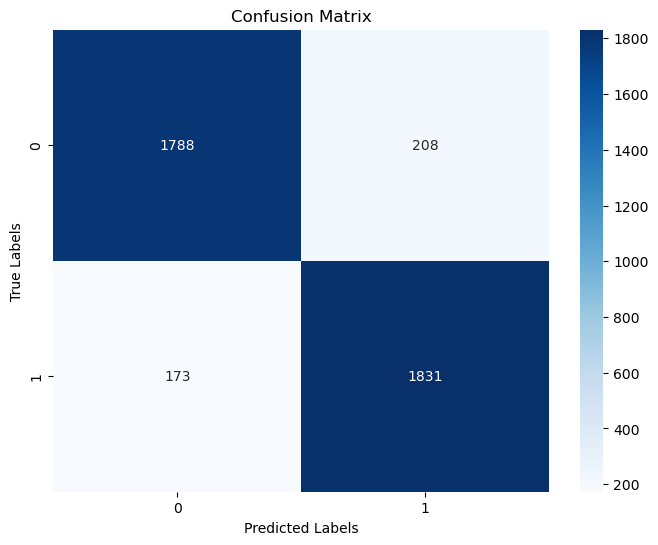

Model: RFC, Accuracy: 0.889


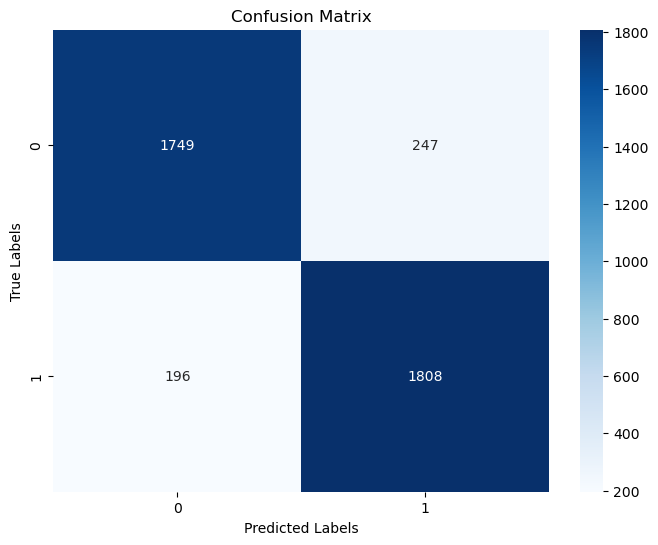

Model: SVC, Accuracy: 0.890


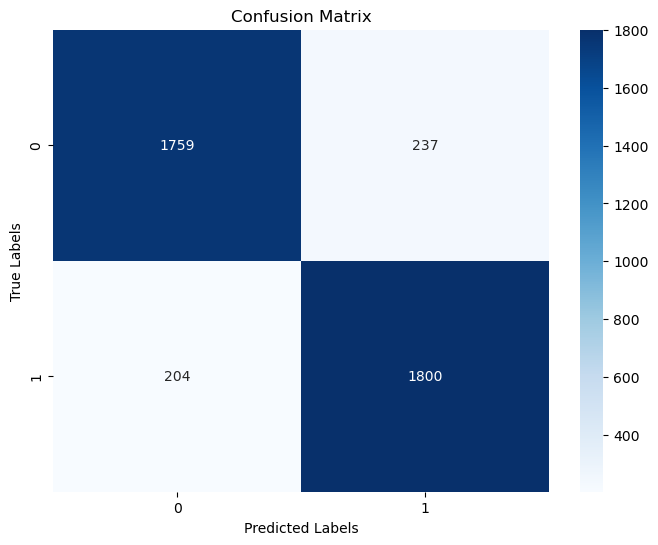

Model: KNN, Accuracy: 0.896


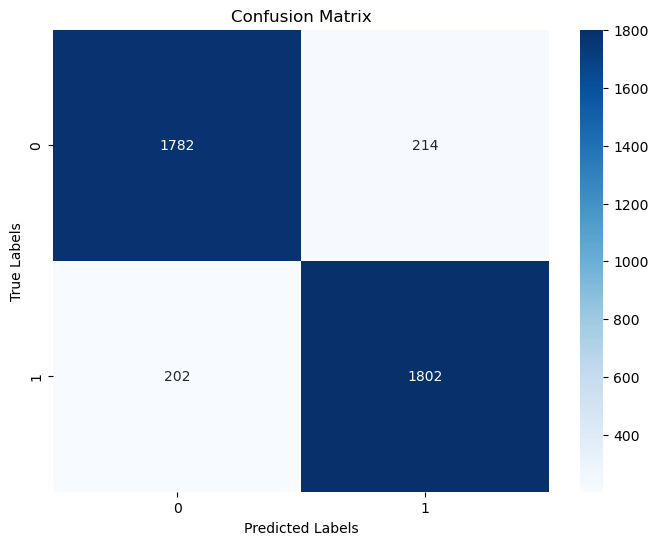

13/13 [==============================] - 0s 508us/step
Model: Sequential, Accuracy: 0.943


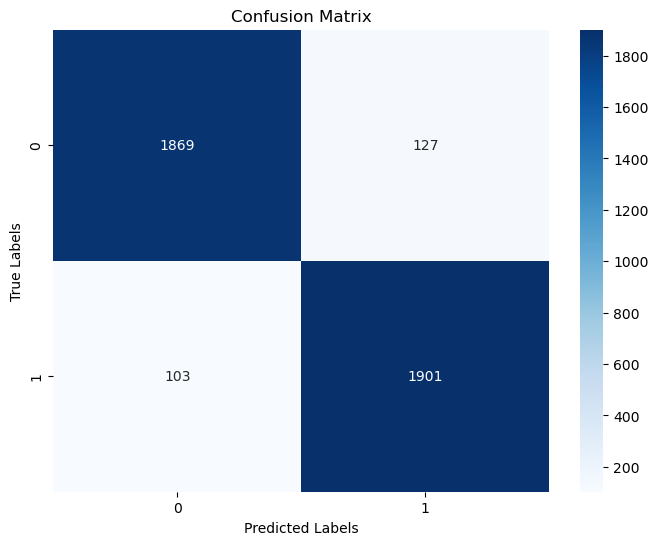

        Model  Accuracy
0         GPC   0.90475
1         RFC   0.88925
2         SVC   0.88975
3         KNN   0.89600
4  Sequential   0.94250


In [44]:
from sklearn.calibration import cross_val_predict

def create_sequential_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Changed loss to binary_crossentropy for binary classification
    return model
# define models to test
def get_models():
  models, names = list(), list()
  # GPC
  models.append(GaussianProcessClassifier()) 
  names.append('GPC')
  # RFC
  models.append(RandomForestClassifier())
  names.append('RFC')
  # SVC
  models.append(SVC())
  names.append('SVC')
  # KNN
  models.append(KNeighborsClassifier())
  names.append('KNN')
  models.append(KerasClassifier(build_fn=create_sequential_model, epochs=50, batch_size=10, verbose=0))
  names.append('Sequential')
  
  return models, names

models, names = get_models()
model_performance = []
for i in range(len(models)):
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('power_transformer', PowerTransformer()), 
        ('model', models[i])
    ])
    
    y_pred = cross_val_predict(pipeline, X, y, cv=10) 

    # Compute the desired metrics
    accuracy = accuracy_score(y, y_pred)

    model_performance.append({
        "Model": names[i],
        "Accuracy": accuracy,
    })

    print(f"Model: {names[i]}, Accuracy: {accuracy:.3f}")
    
    # Generate the confusion matrix
    conf_mat = confusion_matrix(y, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Convert the model_performance to a DataFrame for easier analysis
performance_df = pd.DataFrame(model_performance)
print(performance_df)

# Model Assessment

### As you can see we acheived 94% accuracy on a cross validation prediction method which makes predictions on various subsets of data, the sequential model also performed excellent in the cross_val_score method on multiple subsets of data. Therefore we can say this is the most robust model we have.